In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Univariate regression 

### Linear Regression 

In [2]:
df = pd.read_csv("df_final1.csv")
df_sr = df.copy()
df_sr.head()

,Unnamed: 0,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,...,0.302000,0.53600,0.281,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,...,0.283000,0.93400,0.360,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,...,0.000089,0.80000,0.262,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,...,0.066400,0.00127,0.117,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,...,0.000576,0.09690,0.299,0.6370,143.956,4.0,733.0,183.0,4.067086,happy


In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_sr['genre_encoded'] = label_encoder.fit_transform(df_sr['genre'])
df_sr['explicit_encoded'] = label_encoder.fit_transform(df_sr['explicit'])

In [4]:
df_sr.dtypes

Unnamed: 0            int64
name                 object
duration_ms           int64
explicit               bool
popularity            int64
artists              object
album_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
n_beats             float64
n_bars              float64
processing          float64
genre                object
genre_encoded         int32
explicit_encoded      int64
dtype: object

In [5]:
df_sr.describe()

,Unnamed: 0,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre_encoded,explicit_encoded
count,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000
mean,7505.927757,241408.644825,27.462973,0.570776,0.670251,5.320072,-8.106869,0.635314,0.074506,0.286361,0.270168,0.192352,0.455288,124.413158,3.954254,494.095040,125.625274,2.195270,9.340228,0.059485
std,4340.024376,88674.103460,18.558927,0.178078,0.246920,3.574205,4.479938,0.481360,0.061843,0.318533,0.374270,0.147274,0.270791,29.691267,0.285843,214.020869,54.953954,1.214737,5.757136,0.236539
min,0.000000,21240.000000,0.000000,0.053200,0.000020,0.000000,-26.440000,0.000000,0.022800,0.000000,0.000000,0.011800,0.000000,36.950000,3.000000,37.000000,8.000000,0.748116,0.000000,0.000000
25%,3739.500000,182780.000000,14.000000,0.467000,0.496000,2.000000,-10.049000,0.000000,0.036800,0.007895,0.000000,0.096400,0.224000,100.077000,4.000000,337.000000,85.000000,1.170953,4.000000,0.000000
50%,7498.000000,229615.000000,24.000000,0.592000,0.717000,6.000000,-7.100000,1.000000,0.050100,0.137000,0.002050,0.128000,0.437000,124.962000,4.000000,466.000000,118.000000,1.738916,9.000000,0.000000
75%,11257.500000,286966.500000,42.000000,0.703000,0.884000,8.000000,-5.006000,1.000000,0.084300,0.536000,0.696000,0.258000,0.674000,141.980000,4.000000,620.000000,158.000000,3.349057,14.000000,0.000000
max,14999.000000,605100.000000,83.000000,0.980000,1.000000,11.000000,-0.150000,1.000000,0.344000,0.996000,1.000000,0.792000,0.995000,212.276000,5.000000,1177.000000,295.000000,4.067086,19.000000,1.000000


In [6]:
non_use_columns = ['name', 'artists', 'album_name','explicit','n_beats','n_bars','processing','genre']
df_sr = df_sr.drop(non_use_columns, axis=1)

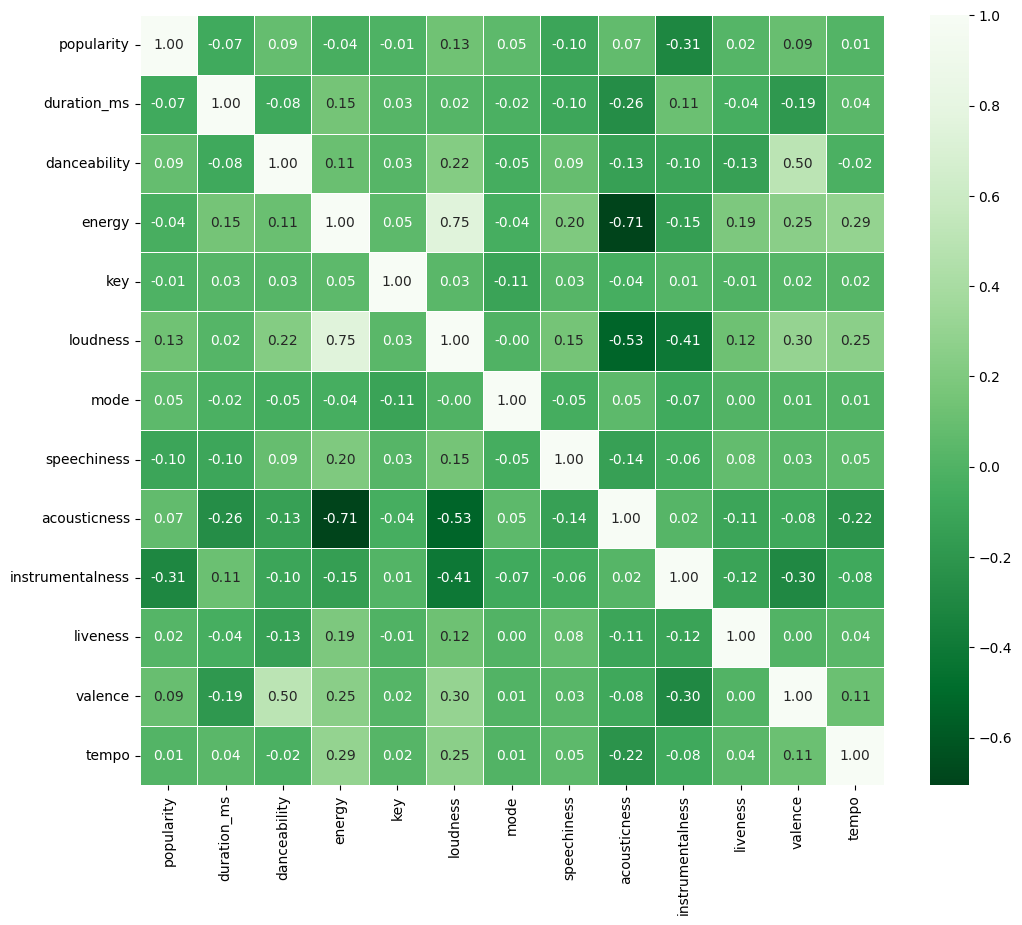

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_include = ['popularity','duration_ms', 'danceability', 'energy', 'key', 'loudness',
                      'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
correlation_matrix = df_sr[columns_to_include].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens_r', fmt=".2f", linewidths=.5)
plt.show()

<Axes: >

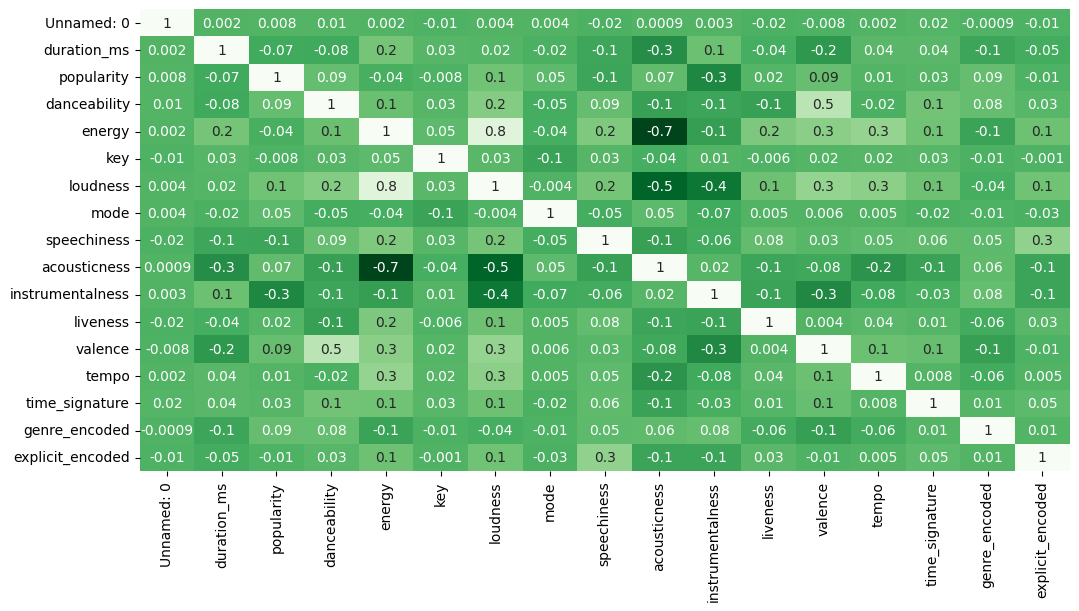

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_sr.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False)

In [9]:
def scat_plot(x, y, hue=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot using given inputs'''
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.scatterplot(x=x, y=y, hue=hue, s=12, data=df)  # Pass data=df_multi here
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14)
    _ = plt.legend(fontsize=12)
    plt.show()

In [10]:
s= df

In [11]:
classified = s.copy()
classified['pop_rating'] = ''

for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 50) & (row.popularity < 75):
        score = 'medium'
    elif row.popularity >= 75:
        score = 'popular'
    classified.at[i, 'pop_rating'] = score

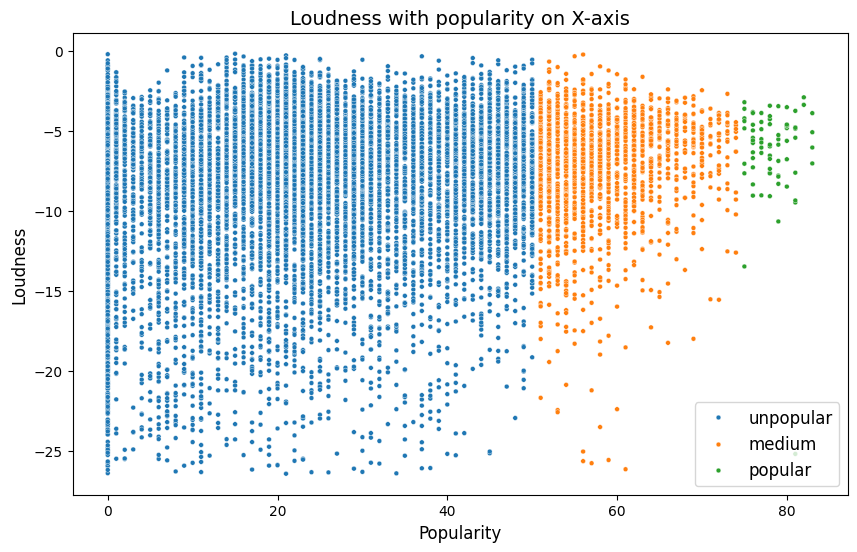

In [12]:
scat_plot(x=s.popularity, y=s.loudness, hue=classified.pop_rating, xlab='Popularity',\
         ylab='Loudness', titl='Loudness with popularity on X-axis')

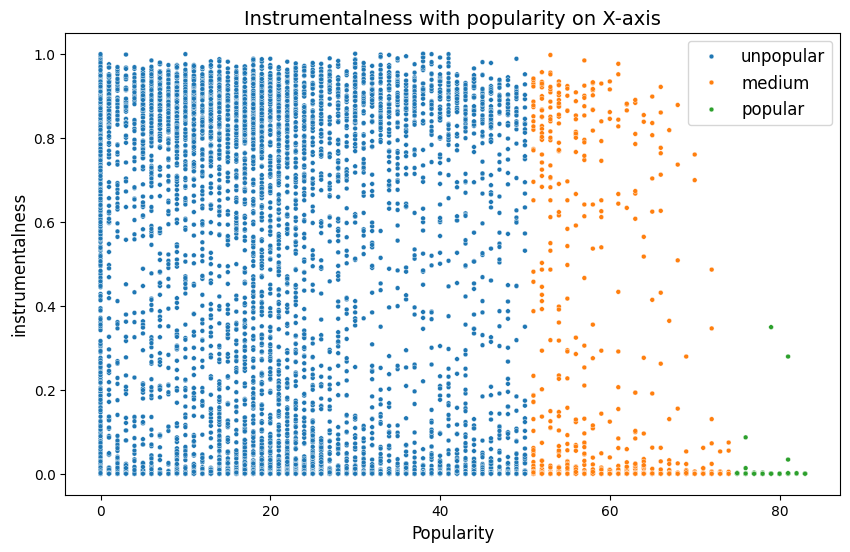

In [13]:
scat_plot(x=s.popularity, y=s.instrumentalness, hue=classified.pop_rating, xlab='Popularity',\
         ylab='instrumentalness', titl='Instrumentalness with popularity on X-axis')

Choose Loudness and Instrumentalness

### Instrumentalness 

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [15]:
# selecting a single feature for simple linear regression 
selected_feature = 'instrumentalness'

In [16]:
# create a DataFrame with the selected feature and the target variable
df_simple = df_sr[[selected_feature, 'popularity']]

In [17]:
# split the data into training and testing sets
X_simple = df_simple[[selected_feature]]
y_simple = df_simple['popularity']
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

In [18]:
# initialize the linear regression model
model_simple = LinearRegression()

In [19]:
# fit the model using the training data
model_simple.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_simple = model_simple.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred_simple)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 315.2101019852908


In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R2: %.3f' % r2_score(y_test, y_pred_simple))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred_simple))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred_simple))

R2: 0.086
MSE: 315.210
MAE: 14.674


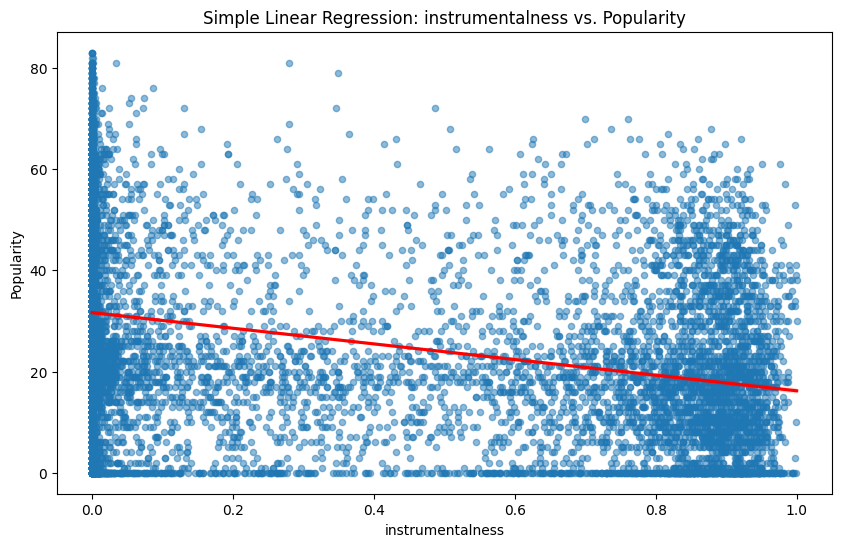

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_simple[selected_feature], y=y_simple, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'Simple Linear Regression: {selected_feature} vs. Popularity')
plt.xlabel(selected_feature)
plt.ylabel('Popularity')
plt.show()

In [24]:
df_simple_1 = df_sr[['loudness', 'popularity']]

In [25]:
df_simple_1

,loudness,popularity
0,-12.529,46
1,-24.801,0
2,-7.445,3
3,-5.607,23
4,-11.340,25
...,...,...
13242,-14.232,0
13243,-19.627,44
13244,-9.103,43
13245,-2.299,37


In [26]:
X_simple_1 = df_simple_1[['loudness']]  
y_simple_1 = df_simple_1['popularity']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_simple_1, y_simple_1, test_size=0.3, random_state=42)

In [27]:
model_simple_1 = LinearRegression()

In [28]:
model_simple_1.fit(X_train_1, y_train_1)

LinearRegression()

In [29]:
y_pred_simple_1 = model_simple_1.predict(X_test_1)

In [30]:
mse_1 = mean_squared_error(y_test_1, y_pred_simple_1)
print(f'Mean Squared Error: {mse_1}')

Mean Squared Error: 335.5061402896834


In [31]:
print('R2: %.3f' % r2_score(y_test_1, y_pred_simple_1))
print('MSE: %.3f' % mean_squared_error(y_test_1, y_pred_simple_1))
print('MAE: %.3f' % mean_absolute_error(y_test_1, y_pred_simple_1))

R2: 0.018
MSE: 335.506
MAE: 15.234


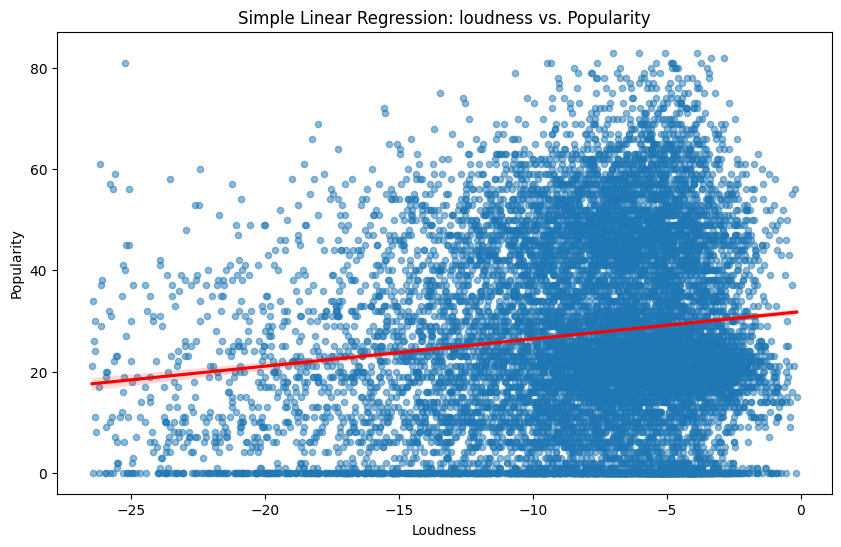

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_simple_1, y=y_simple_1, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'Simple Linear Regression: loudness vs. Popularity')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.show()

### Ridge

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [34]:
selected_feature = 'instrumentalness'

In [35]:
df_ridge = df.copy()
df_ridge = df_ridge[[selected_feature, 'popularity']]

In [36]:
X_ridge = df_ridge[[selected_feature]]
y_ridge = df_ridge['popularity']
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train_ridge_scaled = scaler.fit_transform(X_train_ridge)
X_test_ridge_scaled = scaler.transform(X_test_ridge)

In [38]:
alpha = 1.0  
model_ridge = Ridge(alpha=alpha)

In [39]:
# fit the model using the scaled training data
model_ridge.fit(X_train_ridge_scaled, y_train_ridge)

# predict the target variable on the scaled test set
y_pred_ridge = model_ridge.predict(X_test_ridge_scaled)

In [40]:
# calculate MSE
mse_ridge = mean_squared_error(y_test_ridge, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

Mean Squared Error (Ridge): 315.20980312420727


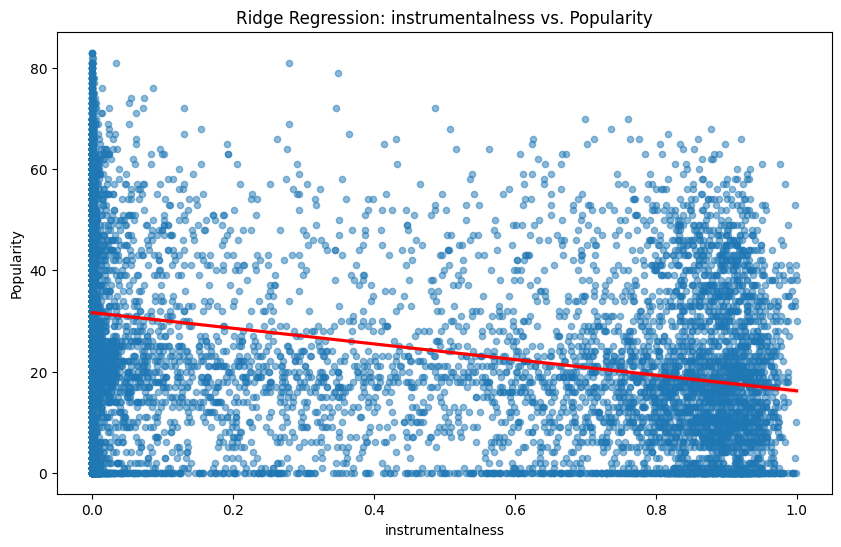

In [41]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_ridge[selected_feature], y=y_ridge, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'Ridge Regression: {selected_feature} vs. Popularity')
plt.xlabel(selected_feature)
plt.ylabel('Popularity')
plt.show()

# Multivariate 

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [43]:
# choose instrumentalness, speechiness and loudness due to higher correlation than others
selected_features = ['instrumentalness', 'speechiness','loudness']

In [44]:
df_multi = df.copy()

In [45]:
df_regression = df_multi[selected_features + ['popularity']]

In [46]:
X_regression = df_regression[selected_features]
y_regression = df_regression['popularity']
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

In [47]:
scaler = StandardScaler()
X_train_regression_scaled = scaler.fit_transform(X_train_regression)
X_test_regression_scaled = scaler.transform(X_test_regression)

In [48]:
reg = LinearRegression()
reg.fit(X_train_regression, y_train_regression)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-15.5032687  -35.18073212   0.09194254]
Intercept: 
 34.89458071491381


### Ridge Regression

In [49]:
# Ridge Regression
alpha_ridge = 10 
model_ridge = Ridge(alpha=alpha_ridge)
model_ridge.fit(X_train_regression_scaled, y_train_regression)
y_pred_ridge = model_ridge.predict(X_test_regression_scaled)
mse_ridge = mean_squared_error(y_test_regression, y_pred_ridge)
print(f'Mean Squared Error (Ridge Regression): {mse_ridge}')

Mean Squared Error (Ridge Regression): 308.1795603978923


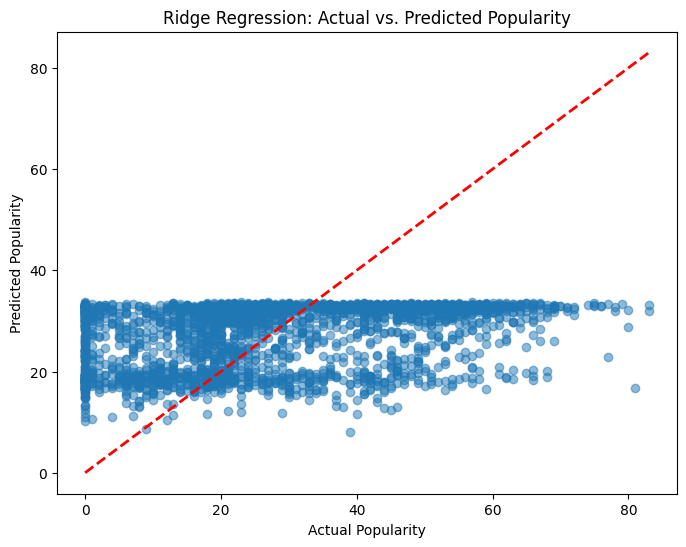

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_regression, y_pred_ridge, alpha=0.5)
plt.plot([min(y_test_regression), max(y_test_regression)], [min(y_test_regression), max(y_test_regression)], linestyle='--', color='red', linewidth=2)
plt.title('Ridge Regression: Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

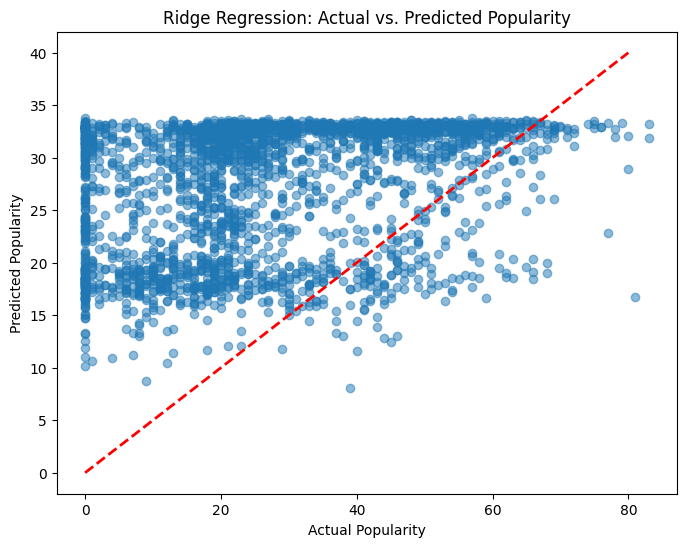

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_regression, y_pred_ridge, alpha=0.5)
plt.plot([0, 80], [0, 40], linestyle='--', color='red', linewidth=2)
plt.title('Ridge Regression: Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

In [52]:
print('R2: %.3f' % r2_score(y_test_regression, y_pred_ridge))
print('MSE: %.3f' % mean_squared_error(y_test_regression, y_pred_ridge))
print('MAE: %.3f' % mean_absolute_error(y_test_regression, y_pred_ridge))

R2: 0.106
MSE: 308.180
MAE: 14.450


In [53]:
model_ridge = Ridge(alpha=alpha_ridge)
model_ridge.fit(X_train_regression_scaled, y_train_regression)
print('Coefficients: \n', model_ridge.coef_)
print('Intercept: \n', model_ridge.intercept_)

Coefficients: 
 [-5.81283658 -2.15945685  0.41271129]
Intercept: 
 27.312258186279134


## Linear Regression

In [54]:
reg = LinearRegression()
reg.fit(X_train_regression, y_train_regression)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-15.5032687  -35.18073212   0.09194254]
Intercept: 
 34.89458071491381


In [55]:
reg = LinearRegression()
reg.fit(X_train_regression, y_train_regression)

LinearRegression()

In [56]:
y_pred1 = reg.predict(X_test_regression)
print('R2: %.3f' % r2_score(y_test_regression, y_pred1))
print('MSE: %.3f' % mean_squared_error(y_test_regression, y_pred1))
print('MAE: %.3f' % mean_absolute_error(y_test_regression, y_pred1))

R2: 0.106
MSE: 308.180
MAE: 14.449


In [57]:
df_multi1 = df.copy()

In [58]:
df_train, df_test = train_test_split(df_multi1, test_size=0.2, random_state=100)

In [59]:
x_train = df_train["instrumentalness"].values.reshape(-1, 1)
y_train = df_train["popularity"].values

x_test = df_test["instrumentalness"].values.reshape(-1, 1)
y_test = df_test["popularity"].values

In [60]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [61]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-15.33975198]
Intercept: 
 31.549096820898985


Text(0.5, 1.0, 'Simple Linear Regression: loudness vs. Popularity')

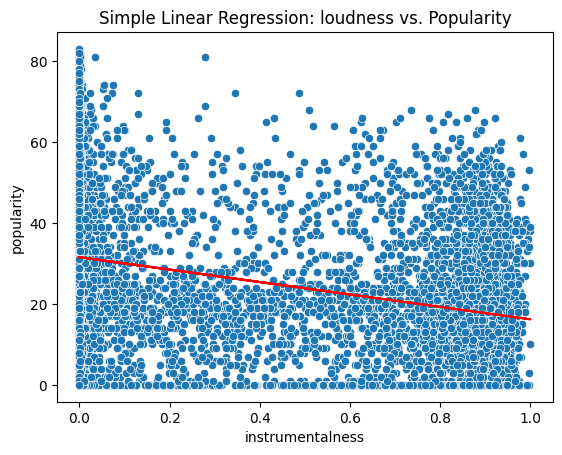

In [62]:
sns.scatterplot(data=df_train, x="instrumentalness", y="popularity")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")
plt.title(f'Simple Linear Regression: loudness vs. Popularity')

In [63]:
df_multi2 = df.copy()

In [64]:
df_regression2 = df_multi2[selected_features + ['popularity']]

In [65]:
X_regression2 = df_regression2[selected_features]
y_regression2 = df_regression2['popularity']
X_train_regression2, X_test_regression2, y_train_regression2, y_test_regression2 = train_test_split(X_regression2, y_regression2, test_size=0.2, random_state=42)

In [66]:
scaler = StandardScaler()
X_train_regression_scaled2 = scaler.fit_transform(X_train_regression2)
X_test_regression_scaled2 = scaler.transform(X_test_regression2)

In [67]:
reg2 = LinearRegression()
reg2.fit(X_train_regression_scaled2, y_train_regression2)
print('Coefficients: \n', reg2.coef_)
print('Intercept: \n', reg2.intercept_)

Coefficients: 
 [-5.81919231 -2.16160357  0.41086673]
Intercept: 
 27.312258186279134


In [68]:
y_pred2 = reg2.predict(X_test_regression_scaled2)
print('R2: %.3f' % r2_score(y_test_regression2, y_pred2))
print('MSE: %.3f' % mean_squared_error(y_test_regression2, y_pred2))
print('MAE: %.3f' % mean_absolute_error(y_test_regression2, y_pred2))

R2: 0.106
MSE: 308.180
MAE: 14.449


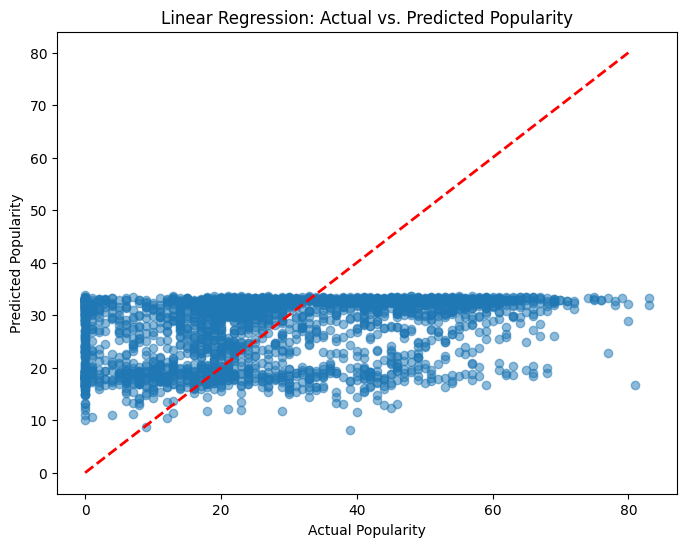

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_regression2, y_pred2, alpha=0.5)
plt.plot([0, 80], [0, 80], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression: Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()